In [100]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data
from base_functions import *
from datetime import datetime, timedelta


<Figure size 640x480 with 0 Axes>

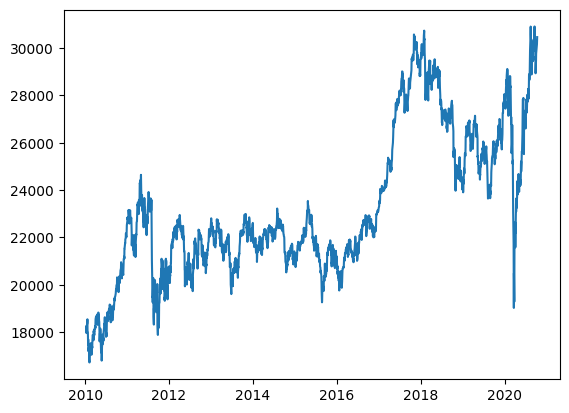

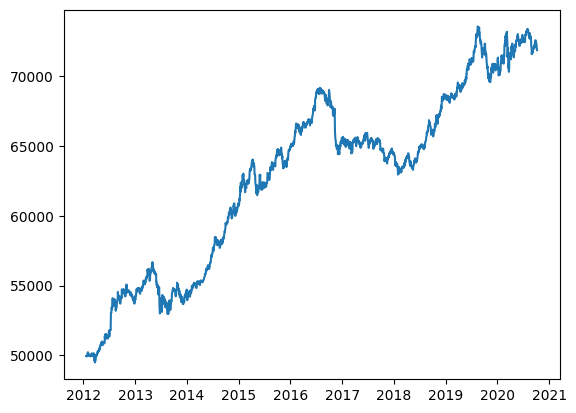

In [95]:
# 실전 투자 전략 : 주식/채권 변동성 조절 전략 (risk parity 전략)

start, end = "2010-01-10", "2020-10-10"
kodex200 = getCloseData("069500", start, end) # 코스피200 ETF
kodex10Bond = getCloseData("152380", start, end) # kodex 국고채 10년물 etf
#kodexInverse = getCloseData("114800", start, end) # kodex inverse

closeData = pd.concat([kodex200, kodex10Bond], axis=1)
closeData.columns = ["kodex200", "kodex10Bond"]
closeData.dropna(inplace=True)

closeData = closeData.loc[getRebalancingDate(closeData)]
plt.figure()
plt.subplots()
plt.plot(kodex200)
plt.subplots()
plt.plot(kodex10Bond)


In [96]:
monthRet = getDayReturn(closeData)
print(monthRet)

            kodex200  kodex10Bond
Date                             
2012-01-31  1.000000     1.000000
2012-02-29  1.037290     0.999502
2012-03-30  0.998265     0.997906
2012-04-30  0.994607     1.013686
2012-05-31  0.922432     1.013304
...              ...          ...
2020-06-30  1.048376     1.000895
2020-07-31  1.068135     1.008047
2020-08-31  1.027288     0.982328
2020-09-29  1.011074     1.007293
2020-10-08  1.023282     0.990898

[106 rows x 2 columns]


In [97]:
def getReturnDistribution(MonthRet, period=12):
    sum = 0
    for i in range(0, 13):
        sum += MonthRet.shift(i).fillna(method="bfill")
        
    mean = sum / 12
    print(f"{period} month mean:\n{mean}")

    sum = 0
    for i in range(0, 13):
        sum += np.square(MonthRet.shift(i).fillna(method="bfill") - mean)
        
    deviation =  sum / 12
    print(f"{period} month distribution :\n{distribution}")
    return deviation

retDist = getReturnDistribution(monthRet)

12 month mean:
            kodex200  kodex10Bond
Date                             
2012-01-31  1.083333     1.083333
2012-02-29  1.086441     1.083292
2012-03-30  1.086296     1.083117
2012-04-30  1.085847     1.084258
2012-05-31  1.079383     1.085367
...              ...          ...
2020-06-30  1.092305     1.086004
2020-07-31  1.093388     1.086202
2020-08-31  1.098930     1.083248
2020-09-29  1.102329     1.082938
2020-10-08  1.099268     1.083481

[106 rows x 2 columns]
12 month distribution :
            kodex200  kodex10Bond
Date                             
2012-01-31  0.007523     0.007523
2012-02-29  0.007673     0.007523
2012-03-30  0.007672     0.007520
2012-04-30  0.007671     0.007551
2012-05-31  0.008074     0.007578
...              ...          ...
2022-06-30  0.009651     0.007641
2022-07-29  0.009926     0.007901
2022-08-31  0.009961     0.007891
2022-09-30  0.010663     0.007881
2022-10-07  0.010977     0.007894

[130 rows x 2 columns]


In [98]:
def getWeightByDist(retDist):
    return retDist.divide(retDist.sum(axis=1), axis=0).fillna(0)

weight = getWeightByDist(retDist)
weight = weight.reindex(columns=["kodex10Bond", "kodex200"])
print(weight)
    

            kodex10Bond  kodex200
Date                             
2012-01-31     0.500000  0.500000
2012-02-29     0.495040  0.504960
2012-03-30     0.495001  0.504999
2012-04-30     0.496071  0.503929
2012-05-31     0.484169  0.515831
...                 ...       ...
2020-06-30     0.408648  0.591352
2020-07-31     0.406016  0.593984
2020-08-31     0.407513  0.592487
2020-09-29     0.409876  0.590124
2020-10-08     0.414082  0.585918

[106 rows x 2 columns]


return: 1.4649946585305167 
 cagr: 2.4788584080359124 
 mdd: 10.471489265659917


<Figure size 640x480 with 0 Axes>

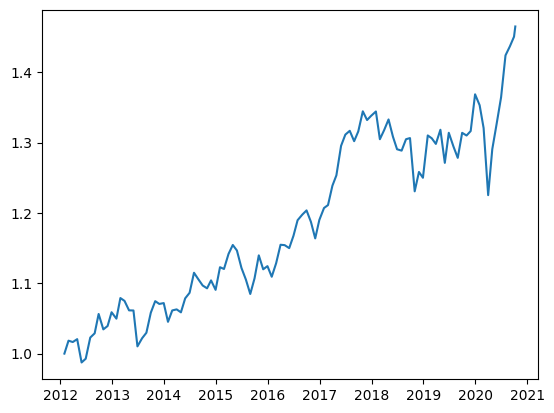

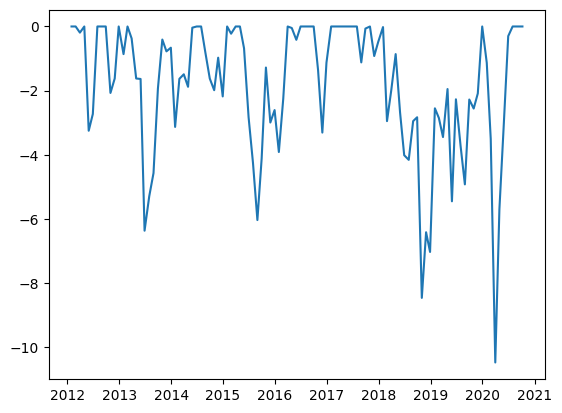

In [99]:
dayRet, cumRet = getRebalancingPortfolio(closeData, period="month", weightDf=weight)
cagr, dd, mdd = getEval(cumRet)

plt.figure()
plt.subplots()
plt.plot(cumRet)
plt.subplots()
plt.plot(-dd)